# Imports 

In [1]:
from datetime import datetime
import numpy as np
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import scipy as sp
import pickle

In [2]:
!pip install cdsapi

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Download Data via Copernicus API

In [4]:
url = 'url: https://cds.climate.copernicus.eu/api/v2'
key = 'key: 59923:dc18e3f9-2ffd-444b-83aa-eecaeac9212a'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api/v2
key: 59923:dc18e3f9-2ffd-444b-83aa-eecaeac9212a


In [6]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            'geopotential', 'relative_humidity', 'specific_rain_water_content',
            'specific_snow_water_content', 'temperature',
        ],
        'pressure_level': [
            '1', '2', '3',
            '5', '7', '10',
            '20', '30', '50',
            '70', '100', '125',
            '150', '175', '200',
            '225', '250', '300',
            '350', '400', '450',
            '500', '550', '600',
            '650', '700', '750',
            '775', '800', '825',
            '850', '875', '900',
            '925', '950', '975',
            '1000',
        ],
        'year': [
            '2018', '2019',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': '15',
        'time': '00:00',
        'area': [
            85, -170, 40,
            -50,
        ],
        'format': 'netcdf',
    },
    '/content/drive/My Drive/era5_2yrs.nc')

2020-10-27 20:42:22,025 INFO Welcome to the CDS
2020-10-27 20:42:22,026 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-10-27 20:42:22,390 INFO Request is queued
2020-10-27 20:44:18,394 INFO Request is running
2020-10-27 20:48:45,228 INFO Request is completed
2020-10-27 20:48:45,230 INFO Downloading http://136.156.133.25/cache-compute-0008/cache/data7/adaptor.mars.internal-1603831454.2830505-27236-14-d54bfec5-9b98-4533-964a-491f6ed77cbe.nc to /content/drive/My Drive/era5_2yrs.nc (737.3M)
2020-10-27 20:51:26,038 INFO Download rate 4.6M/s


Result(content_length=773106904,content_type=application/x-netcdf,location=http://136.156.133.25/cache-compute-0008/cache/data7/adaptor.mars.internal-1603831454.2830505-27236-14-d54bfec5-9b98-4533-964a-491f6ed77cbe.nc)

# Load Data

In [5]:
path = "/content/drive/My Drive"
file = os.path.join(path, "era5_2yrs.nc")

In [6]:
DS = xr.open_dataset(file)

In [7]:
DS

<xarray.Dataset>
Dimensions:    (latitude: 181, level: 37, longitude: 481, time: 24)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.75 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 85.0 84.75 84.5 84.25 ... 40.5 40.25 40.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2018-01-15 2018-02-15 ... 2019-12-15
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    crwc       (time, level, latitude, longitude) float32 ...
    cswc       (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-27 20:47:35 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [8]:
# Convert XArray to dataframe
ds = DS.to_dataframe()

In [9]:
ds

z  ...           t
latitude level longitude time                       ...            
85.0     1     -170.0    2018-01-15  426127.000000  ...  243.416428
                         2018-02-15  471957.218750  ...  245.021347
                         2018-03-15  447069.093750  ...  237.073944
                         2018-04-15  459232.937500  ...  256.905884
                         2018-05-15  477895.218750  ...  279.941528
...                                            ...  ...         ...
40.0     1000  -50.0     2019-08-15    1673.125000  ...  297.607849
                         2019-09-15    1135.375000  ...  289.534485
                         2019-10-15    1536.796875  ...  291.052063
                         2019-11-15    2173.015625  ...  285.235748
                         2019-12-15    2741.062500  ...  285.615631

[77310168 rows x 5 columns]

# Data preprocessing

In [10]:
ds.reset_index(inplace=True)
ds['time'] = pd.to_datetime(ds['time'])

In [11]:
ds

latitude  level  longitude  ...          crwc          cswc           t
0             85.0      1     -170.0  ...  0.000000e+00 -1.164153e-10  243.416428
1             85.0      1     -170.0  ...  0.000000e+00 -1.164153e-10  245.021347
2             85.0      1     -170.0  ...  0.000000e+00 -1.164153e-10  237.073944
3             85.0      1     -170.0  ...  0.000000e+00 -1.164153e-10  256.905884
4             85.0      1     -170.0  ...  0.000000e+00 -1.164153e-10  279.941528
...            ...    ...        ...  ...           ...           ...         ...
77310163      40.0   1000      -50.0  ...  3.401772e-06 -1.164153e-10  297.607849
77310164      40.0   1000      -50.0  ...  1.952084e-05 -1.164153e-10  289.534485
77310165      40.0   1000      -50.0  ...  2.616434e-08 -1.164153e-10  291.052063
77310166      40.0   1000      -50.0  ...  1.150055e-05 -1.164153e-10  285.235748
77310167      40.0   1000      -50.0  ...  0.000000e+00 -1.164153e-10  285.615631

[77310168 rows x 9 columns]

In [16]:
# Load in locations/dates of relevant vertical profiles
locs = pd.read_csv('/content/drive/My Drive/era5_loc_2yrs.csv') 

In [17]:
locs.rename(columns={'i': 'latitude', 'j':'longitude'}, inplace=True)
locs['time'] = pd.to_datetime(locs['time'])

In [18]:
locs.drop_duplicates()

latitude  longitude       time
0            83.0     -74.50 2018-06-15
1            83.0     -74.50 2018-08-15
2            83.0     -74.50 2018-09-15
3            83.0     -74.50 2019-05-15
4            83.0     -74.50 2019-06-15
...           ...        ...        ...
1606711      40.0     -94.50 2019-02-15
1607102      40.0     -89.25 2018-01-15
1607183      40.0     -87.75 2018-03-15
1607875      40.0     -75.00 2018-01-15
1607893      40.0     -74.75 2018-01-15

[294519 rows x 3 columns]

In [19]:
# Only take observations that have corresponding skin temperatures of -5 to 5 degrees
merged_ds = pd.merge(ds, locs, on=['longitude', 'latitude', 'time'])
merged_ds.drop_duplicates(inplace=True)
merged_ds

latitude  level  longitude  ... crwc          cswc           t
0             83.0      1      -80.0  ...  0.0 -1.164153e-10  284.205750
2             83.0      2      -80.0  ...  0.0 -1.164153e-10  277.806396
4             83.0      3      -80.0  ...  0.0 -1.164153e-10  269.901642
6             83.0      5      -80.0  ...  0.0 -1.164153e-10  254.805252
8             83.0      7      -80.0  ...  0.0 -1.164153e-10  247.983337
...            ...    ...        ...  ...  ...           ...         ...
59493807      40.0    900      -74.0  ...  0.0 -1.164153e-10  274.687958
59493809      40.0    925      -74.0  ...  0.0 -1.164153e-10  274.659515
59493811      40.0    950      -74.0  ...  0.0 -1.164153e-10  275.833771
59493813      40.0    975      -74.0  ...  0.0 -1.164153e-10  277.402100
59493815      40.0   1000      -74.0  ...  0.0 -1.164153e-10  279.153290

[10897203 rows x 9 columns]

In [20]:
ii = merged_ds.sort_values(by = ['latitude', 'longitude', 'time', 'level']).groupby(['latitude', 'longitude', 'time'])

In [21]:
# List to store vertical profiles of interest
dfs = []
for name, group in ii:
  group['t'] = group['t'].map(lambda x: x - 273.15)
  group['snow_frac'] = group.apply(lambda row: row['cswc']/(row['crwc'] + row['cswc']), axis=1)
  dfs.append(group)

In [22]:
len(dfs)

294519

In [23]:
final_ds = pd.concat(dfs)

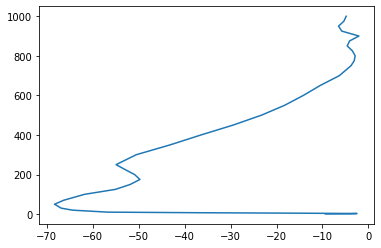

In [24]:
# Plot vertical profiles
i = 1000
plt.plot(dfs[i]['t'], dfs[i]['level'] )

In [25]:
# Fix invalid snow fraction values
final_ds['snow_frac'] = final_ds['snow_frac'].map(lambda x: 0 if x < 0 else x) 
final_ds['snow_frac'] = final_ds['snow_frac'].map(lambda x: 1 if x > 1 else x) 

In [26]:
final_ds.set_index(['latitude', 'longitude', 'time'])

level              z  ...          t  snow_frac
latitude longitude time                              ...                      
40.0     -123.75   2019-02-15      1  460384.156250  ... -16.945013        1.0
                   2019-02-15      2  409153.687500  ... -17.418356        1.0
                   2019-02-15      3  379902.968750  ... -26.769553        1.0
                   2019-02-15      5  344388.531250  ... -35.251242        1.0
                   2019-02-15      7  321916.500000  ... -47.076849        1.0
...                              ...            ...  ...        ...        ...
83.0     -66.50    2019-08-15    900    9853.031250  ...   4.172876        0.0
                   2019-08-15    925    7664.156250  ...   5.168329        0.0
                   2019-08-15    950    5528.281250  ...   4.875787        1.0
                   2019-08-15    975    3453.015625  ...   3.821436        0.0
                   2019-08-15   1000    1445.906250  ...   2.393243        0.0

[10897203 rows x 7 columns]

In [27]:
# Check that every level has the same number of samples+
final_ds['level'].value_counts()

1000    294519
300     294519
225     294519
200     294519
175     294519
150     294519
125     294519
100     294519
70      294519
50      294519
30      294519
20      294519
10      294519
7       294519
5       294519
3       294519
2       294519
250     294519
350     294519
975     294519
400     294519
950     294519
925     294519
900     294519
875     294519
850     294519
825     294519
800     294519
775     294519
750     294519
700     294519
650     294519
600     294519
550     294519
500     294519
450     294519
1       294519
Name: level, dtype: int64

In [28]:
final_ds['snow_frac'].hist(bins=50)

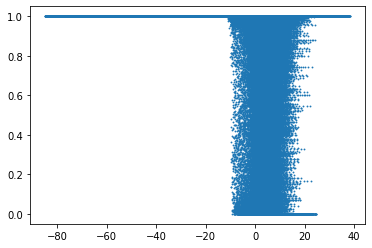

In [29]:
plt.scatter(final_ds.t, final_ds.snow_frac, s=0.7)

In [30]:
sns.jointplot(x=final_ds['t'], y=final_ds['snow_frac'], kind='hex', bins='log') 

In [58]:
final_ds.to_csv('/content/drive/My Drive/final_ds.csv')

# Isotonic Regression

In [31]:
from sklearn.isotonic import IsotonicRegression

x = final_ds['t']
y = final_ds['snow_frac']
xx = np.linspace(x.min(), x.max(), 1000) # for graphing

ir = IsotonicRegression(increasing=False).fit(x, y)

# Actual predictions
y_pred = ir.predict(x)

# For graphing
yy_pred = ir.predict(xx)

In [32]:
plt.scatter(x, y, marker='o', edgecolor='white', linewidth=0.3, label='Original', s=20)
plt.plot(xx, yy_pred, color='green', label= 'Isotonic', linewidth=2)
plt.xlabel('Air Temperature ($^\circ$C)')
plt.ylabel('Snow Fraction')

Text(0, 0.5, 'Snow Fraction')

# Pivoting


In [35]:
# # List to store vertical profiles of interest
# dfs = []
# for name, group in ii:
#   # Convert temperature from K to degrees Celsius
#   group['t'] = group['t'].map(lambda x: x - 273.15)

#   # # Construct snow_fraction column
#   # group['snow_frac'] = group.apply(lambda row: row['cswc']/(row['crwc'] + row['cswc']), axis=1)

#   # Construct target variable: snow fraction for final pressure level
#   snow_frac = group['cswc'].to_list()[-1]/(group['cswc'].to_list()[-1] + group['crwc'].to_list()[-1])
#   group = group[['latitude', 'level', 'longitude', 'time', 't']]
#   group_pivoted = group.pivot(index=['latitude', 'longitude', 'time'], columns='level')['t'].reset_index()
#   group_pivoted.columns.name = None
#   group_pivoted['snow_frac'] = snow_frac
#   dfs.append(group_pivoted)

In [ ]:
# final_df = pd.concat(dfs)
# final_df

In [37]:
# # Fix invalid snow fraction values
# final_df['snow_frac'] = final_df['snow_frac'].map(lambda x: 0 if x < 0 else x) 
# final_df['snow_frac'] = final_df['snow_frac'].map(lambda x: 1 if x > 1 else x) 

In [38]:
# final_df.set_index(['latitude', 'longitude', 'time'], inplace=True)

In [39]:
# final_df.sort_index(level=1)

1          2  ...      1000  snow_frac
latitude longitude time                              ...                     
52.75    -170.0    2018-01-15 -31.838248 -30.712775  ...  3.366357   0.000000
                   2018-02-15 -21.079199 -37.288885  ...  3.415125   0.000000
                   2018-03-15  -7.469885 -18.009543  ...  2.149469   0.000000
                   2018-05-15  -5.684180  -1.015692  ...  3.453729   1.000000
                   2018-11-15 -35.328436 -46.434882  ...  4.290704   0.000000
...                                  ...        ...  ...       ...        ...
82.25    -50.0     2019-08-15   3.882379  -3.888281  ...  5.639642   1.000000
82.50    -50.0     2018-06-15   8.045007   6.448206  ... -0.629675   1.000000
                   2018-07-15   8.745874  10.208582  ...  6.939844   1.000000
                   2018-08-15   2.053979  -2.998450  ...  0.566888   0.030749
                   2019-08-15   3.904718  -3.609961  ...  3.092096   0.000000

[294519 rows x 38 columns]

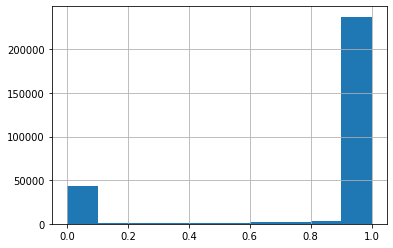

In [40]:
# final_df['snow_frac'].hist()

In [57]:
# final_df.to_csv('/content/drive/My Drive/df_pivoted.csv')

In [4]:
final_df = pd.read_csv('/content/drive/My Drive/df_pivoted.csv')
final_df.set_index(['latitude', 'longitude', 'time'], inplace=True)

# Classification Functions

In [5]:
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix

def cm_plot(y_true, y_pred, classes, cm_fig_path=None,
                normalize=False,
                title=None,
                cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    
    samples = np.array(y_true).shape[0]
    accuracy = np.trace(cm) / float(np.sum(cm)) * 100
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # print('for i {} and j {} : {}'.format(i, j, cm[i,j]))
            ax.annotate(format(cm[i, j], fmt), (j, i),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")
    np.set_printoptions(precision=2)
#     plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('\nPredicted label\naccuracy={:0.2f}%; N={}'.format(accuracy, samples))
    plt.ylim([2.5, -.5])
    plt.tight_layout()
    if cm_fig_path is not None:
        plt.savefig(cm_fig_path)
    plt.show()
    plt.close('all')


In [6]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, PowerTransformer

def Standardize(X, y, method="robust"):
    if method == "robust":
        X_norm = RobustScaler().fit_transform(np.array(X))
    elif method == "standard":
        X_norm = StandardScaler().fit_transform(np.array(X))
    elif method == "power":
        X_norm = PowerTransformer().fit_transform(np.array(X))
    elif method == "none":
        X_norm = X
    y_encoded = LabelEncoder().fit_transform(y)
    return X_norm, y_encoded

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

def Train_and_Evaluate_Classifier(X, y_encoded, y, classifier='sgd', normalize=None, kernel='linear', ccp_alpha=0.015, max_depth=30, min_samples_leaf=0.05, min_samples_split=0.05, max_iter=1000):
    if classifier == 'sgd':
        clf = SGDClassifier(class_weight="balanced", loss='hinge', penalty='l1')
        title = "SGD Classifier"
    elif classifier == 'svm':
        if kernel == 'linear':
            clf = LinearSVC(dual=False, class_weight='balanced', penalty='l1', max_iter=max_iter)
            title = "LinearSVM Classifier"
        else:
            clf = SVC(kernel=kernel, class_weight='balanced', cache_size=4*1024)
            title = str(kernel + " SVM Classifier")
    elif classifier == 'nb':
        clf = GaussianNB()
#         clf.partial_fit(X, y_encoded, classes=np.unique(y_encoded))
        title = "Naive Bayes Classifier"
    elif classifier == 'gp':
        clf = GaussianProcessClassifier(copy_X_train=False)
        title = 'Gaussian Process Classifier'
    elif classifier == "decision_tree":
        clf = DecisionTreeClassifier(
            class_weight='balanced', 
            ccp_alpha=ccp_alpha, 
            min_samples_leaf=min_samples_leaf,
            max_depth=max_depth, 
            min_samples_split=min_samples_split
        )
        title = "Decision Tree Classifier"
    elif classifier == "random_forest":
        clf = RandomForestClassifier(
            n_jobs=-1, 
            class_weight="balanced_subsample",
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            ccp_alpha=ccp_alpha
        )
        title = "Random Forest Classifier"
    clf.fit(X, y_encoded)
    y_pred = clf.predict(X)           
    pred = [round(value) for value in y_pred]
    print("Classifier Accuracy %.2f%%" % (balanced_accuracy_score(y_encoded, pred) * 100.0))
    print('------------------------------------------------------------------------')
    print(classification_report(y_encoded, pred, target_names=list(np.unique(y))))
    cm_plot(y_encoded, y_pred, list(np.unique(y)), normalize=normalize, cm_fig_path='cm.png', title=title)
    return clf, y_pred

In [8]:
def Precip_Type(x, lower_thresh=0.05, upper_thresh=0.95):
    if x <= lower_thresh:
        return "Rain"
    elif x > lower_thresh and x <= upper_thresh:
        return "Mixed"
    else:
        return "Snow"
        

# Classification

In [ ]:
# final_df['precip_type'] = final_df['snow_frac'].map(Precip_Type)
# final_df

In [9]:
final_df['precip_type'].value_counts()

Snow     234230
Rain      43107
Mixed     17182
Name: precip_type, dtype: int64

In [10]:
final_df['precip_type'].hist(bins=5)

Class imbalance needs to be addressed

In [11]:
y = final_df['precip_type']
X = final_df.drop(['snow_frac', 'precip_type'], axis=1)

In [12]:
encodings = {"Rain": 1, "Mixed": 0, "Snow": 2}

In [13]:
X_norm_pow, y_encoded = Standardize(X, y, method='power')
X_norm_robust, y_encoded = Standardize(X, y, method='robust')
X_norm_std, y_encoded = Standardize(X, y, method='standard')
X_norm, y_encoded = Standardize(X, y, method='none')

In [14]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
over = SMOTE('auto')
under = RandomUnderSampler('majority')
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_smote, y_smote = pipeline.fit_resample(X_norm_robust, y_encoded)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


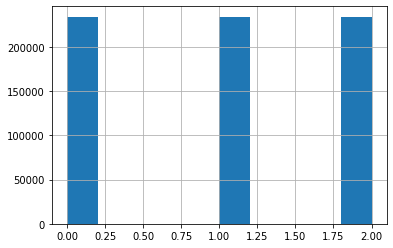

In [16]:
pd.Series(y_smote).hist()

#### SVM

In [17]:
linsvm, linsvm_pred = Train_and_Evaluate_Classifier(X_norm_robust, y_encoded, y, classifier='svm', normalize='all', kernel='linear', max_iter=10000) 

Classifier Accuracy 47.49%
------------------------------------------------------------------------
              precision    recall  f1-score   support

       Mixed       0.19      0.10      0.14     17182
        Rain       0.39      0.45      0.42     43107
        Snow       0.86      0.87      0.87    234230

    accuracy                           0.76    294519
   macro avg       0.48      0.47      0.47    294519
weighted avg       0.76      0.76      0.76    294519



Classifier Accuracy 53.84%
------------------------------------------------------------------------
              precision    recall  f1-score   support

       Mixed       0.51      0.40      0.45    234230
        Rain       0.52      0.57      0.55    234230
        Snow       0.58      0.64      0.61    234230

    accuracy                           0.54    702690
   macro avg       0.54      0.54      0.53    702690
weighted avg       0.54      0.54      0.53    702690



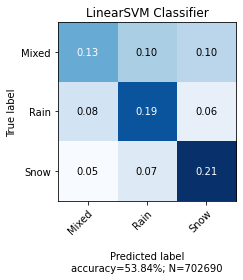

(LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=10000,
           multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
           verbose=0), array([1, 1, 0, ..., 0, 0, 0]))

In [18]:
Train_and_Evaluate_Classifier(X_smote, y_smote, y, classifier='svm', normalize='all', kernel='linear', max_iter=10000) 

#### SGD

Classifier Accuracy 45.58%
------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Mixed       0.00      0.00      0.00     17182
        Rain       0.38      0.48      0.43     43107
        Snow       0.86      0.88      0.87    234230

    accuracy                           0.77    294519
   macro avg       0.42      0.46      0.43    294519
weighted avg       0.74      0.77      0.76    294519



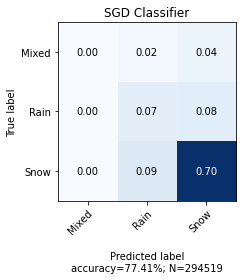

(SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 array([2, 2, 2, ..., 2, 1, 1]))

In [19]:
Train_and_Evaluate_Classifier(X_norm_pow, y_encoded, y, normalize='all') 

In [21]:
Train_and_Evaluate_Classifier(X_smote, y_smote, y, normalize='all')

Classifier Accuracy 49.43%
------------------------------------------------------------------------
              precision    recall  f1-score   support

       Mixed       0.51      0.07      0.12    234230
        Rain       0.47      0.71      0.57    234230
        Snow       0.52      0.70      0.60    234230

    accuracy                           0.49    702690
   macro avg       0.50      0.49      0.43    702690
weighted avg       0.50      0.49      0.43    702690



(SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 array([1, 1, 1, ..., 1, 2, 1]))

#### Random Forests

Classifier Accuracy 63.78%
------------------------------------------------------------------------
              precision    recall  f1-score   support

       Mixed       0.15      0.68      0.24     17182
        Rain       0.38      0.65      0.48     43107
        Snow       0.97      0.59      0.74    234230

    accuracy                           0.60    294519
   macro avg       0.50      0.64      0.49    294519
weighted avg       0.84      0.60      0.67    294519



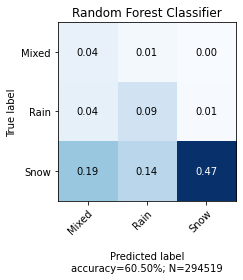

In [55]:
 rf, rf_pred = Train_and_Evaluate_Classifier(
    X_norm_robust, 
    y_encoded, 
    y, 
    classifier='random_forest', 
    normalize='all',
    ccp_alpha=1e-5,
    min_samples_leaf=1,
    max_depth=None
)

Classifier Accuracy 65.11%
------------------------------------------------------------------------
              precision    recall  f1-score   support

       Mixed       0.58      0.69      0.63    234230
        Rain       0.63      0.67      0.65    234230
        Snow       0.81      0.60      0.69    234230

    accuracy                           0.65    702690
   macro avg       0.67      0.65      0.65    702690
weighted avg       0.67      0.65      0.65    702690



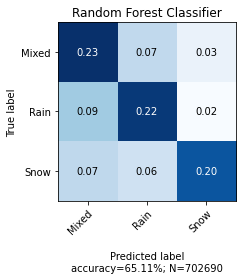

(RandomForestClassifier(bootstrap=True, ccp_alpha=1e-05,
                        class_weight='balanced_subsample', criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=0.05, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=None, verbose=0, warm_start=False),
 array([0, 1, 0, ..., 0, 2, 0]))

In [20]:
Train_and_Evaluate_Classifier(
    X_smote, 
    y_smote, 
    y, 
    classifier='random_forest', 
    normalize='all',
    ccp_alpha=1e-5,
    min_samples_leaf=1,
    max_depth=None
)

## Regression

